# Uvod u pandas

Importovanje paketa `pandas`:

In [1]:
import pandas as pd

## Osnovne strukture podatka

* Series
* DataFrame

### Series

Jednodimenzioni niz duzine `n` sa labeliranim indeksima. 

In [4]:
s = pd.Series([2,2,5,6,7])
s
kolona

0    2
1    2
2    5
3    6
4    7
dtype: int64

In [5]:
s1 = pd.Series([2,2,5,6,7], index=['a', 'b', 'c', 'd', 'e'])
s1

a    2
b    2
c    5
d    6
e    7
dtype: int64

In [6]:
s + s1

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
dtype: float64

In [7]:
s2 = pd.Series([1,2,3,4,5])
s + s2

0     3
1     4
2     8
3    10
4    12
dtype: int64

In [8]:
s.iloc[2:4]

2    5
3    6
dtype: int64

In [9]:
type(s.values)

numpy.ndarray

In [10]:
s.value_counts()

2    2
5    1
6    1
7    1
dtype: int64

### DataFrame

Dvodimenzionalna, promenljive velicine, potencionalno hetorogenih tabelarnih podataka.

In [11]:
pd.DataFrame([[1,2,3],[4,5,6]])

,0,1,2
0,1,2,3
1,4,5,6


Takodje kolone i redovi mogu biti labelirani.

In [12]:
pd.DataFrame([["pera", 22], ["maja", 21]], columns=["ime", "godine"])

,ime,godine
0,pera,22
1,maja,21


In [16]:
people = {'ime': pd.Series(["pera", "maja"]),
          'godine': pd.Series([22, 21])}
df = pd.DataFrame(people)
df

,ime,godine
0,pera,22
1,maja,21


In [17]:
df.dtypes

ime       object
godine     int64
dtype: object

In [18]:
df['ime']

0    pera
1    maja
Name: ime, dtype: object

In [20]:
df[['ime']]

,ime
0,pera
1,maja


In [22]:
print(type(df['ime']), type(df[['ime']]))kolona

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


Ovo ima smisla jer `DataFrame` se dobija ako se iz njega izdvoji lista kolona! Dok se `Series` dobija kao jedna jedina kolona!

In [24]:
df[['ime', 'godine']]

,ime,godine
0,pera,22
1,maja,21


In [27]:
df[df['godine'] > 21][['ime']]

,ime
0,pera


## Ucitavanje iris skupa podataka

In [30]:
df = pd.read_csv('Data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df.shape

(150, 5)

Provera da li postoji neka kolona koja ima na nepostojacu vrednost:

In [37]:
df.isna().any()

sepal.length    False
sepal.width     False
petal.length    False
petal.width     False
variety         False
dtype: bool

Neki algoriti ne podrzavaju instance koje imaju nepostojacu vrednost pa onda koristimo `dropna` za odbacivanje i `fillna` za zamenu nepostojace vrednosti default vrednoscu.

In [39]:
df.dropna()
df.fillna(0)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Matrica korelacija:

In [40]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


Vidimo da su `petal.width` i `petal.length` jako korelisane. U ovakvim slucajevima mozemo da izbacimo jednu u njih, kako bi ubrzali proces treniranja.

Izdvojimo sada imena ulaznih promenljivih i ime ciljne promenljive, kako bih razdvojili ulazne podatke od ciljne promenljive.

In [46]:
feature_names = list(df.columns[:-1])
label_name = df.columns[-1:][0]
print("Feature names: ", feature_names)
print("Label name: ", label_name)

Feature names:  ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
Label name:  variety


In [47]:
X = df[feature_names]
y = df[label_names]

In [48]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
y

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


# Sklearn

## Train Test Split

Importovanje `train_test_split`

In [51]:
from sklearn.model_selection import train_test_split

Delimo podatke na one za treniranje i one za treniranje, gde ce podela biti izvrsena na $70\%\ 30\%$. Koristimo
stratifikaciju po `y` jer zelimo da imamo isti odnos svih
instanci u ovim podskupovima skupa podataka. Takodje, mozemo koristiti i `shuffle` za mesanje instanci podataka.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [59]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(105, 4) (45, 4)
(105, 1) (45, 1)


## Klasifikacija: Drvo Odlucivanja

In [60]:
from sklearn.tree import DecisionTreeClassifier

Pravljenje i treniranje modela

In [140]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [141]:
plt.figure(figsize=(10, 10))

model.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

<Figure size 720x720 with 0 Axes>

In [142]:
model.feature_importances_

array([0., 0., 0., 1.])

### Ocenjivanje modela

In [143]:
y_train_predict = model.predict(X_train)

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [145]:
accuracy_score(y_train, y_train_predict)

0.9714285714285714

In [146]:
confusion_matrix(y_train, y_train_predict)

array([[35,  0,  0],
       [ 0, 33,  2],
       [ 0,  1, 34]])

Predvidja sve tacno na trening skupu, ali hocemo da vidimo kako model radi za nove podatke koje do sada nije video:

In [147]:
model.score(X_test, y_test)

0.8888888888888888

In [148]:
confusion_matrix(y_test, model.predict(X_test))

array([[15,  0,  0],
       [ 0, 12,  3],
       [ 0,  2, 13]])

In [149]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.86      0.80      0.83        15
   Virginica       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



### Stampanje stabla odlucivanja

In [150]:
from sklearn import tree
import matplotlib.pyplot as plt

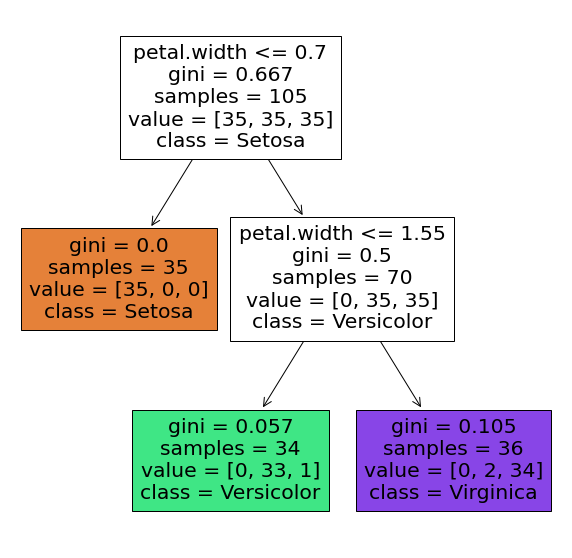

In [151]:
plt.figure(figsize=(10, 10))
_ = tree.plot_tree(
    model, 
    feature_names=feature_names, 
    class_names=model.classes_, 
    filled=True
)

Rucnim podesavanjem hiperparametara modela mozemo da dobijemo bolje rezultate. Ali to se ne radi, jer nam `Sklearn` omogucava da to radi umesto nas.

## Podesavanje parametara modela

Pored traning i test skupa koristimo validacioni skup,
na kome cemo da testiramo razne hiperparametre modela.

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4],
    'min_samples_leaf': [1,2,3]
}

model = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid=parameters, 
    scoring='accuracy', 
    cv=5
)

In [154]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='accuracy')

In [155]:
model.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}

In [156]:
model.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [157]:
model.best_score_

0.9523809523809523

In [158]:
model.score(X_test, y_test)

0.8888888888888888

In [159]:
confusion_matrix(y_test, model.predict(X_test))

array([[15,  0,  0],
       [ 0, 12,  3],
       [ 0,  2, 13]])

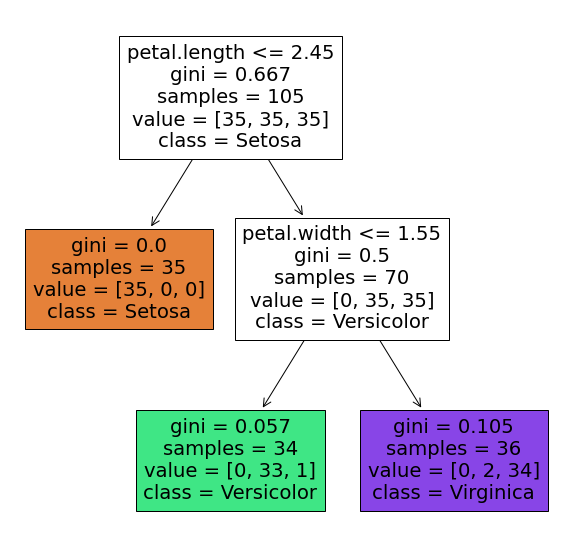

In [160]:
plt.figure(figsize=(10, 10))
_ = tree.plot_tree(
    model.best_estimator_, 
    feature_names=feature_names, 
    class_names=model.best_estimator_.classes_, 
    filled=True
)